# Caso de triaje

En este caso de uso vamos a analizar con unos de pacientes las variables más importantes de cada a construir un modelo de aprendizaje automático para la detección precoz de un posible infarto

## Paso 1: Carga de datos y análisis técnico

- Comprobar el total de muestras;
- Comprobar la presencia de datos nulos;
- Buscar o analizar las variables por su tipo: Numéricas vs categóricas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [2]:
## Cargamos los datos

camino="D:\\0001_11_2016_PERSONAL\\datahack\\Sesion_Mayo_2021\\Seminario-Mayo-2021-main\\"

archivo="heart_statlog_cleveland_hungary_final.xlsx"

In [5]:
camino+archivo

'D:\\0001_11_2016_PERSONAL\\datahack\\Sesion_Mayo_2021\\Seminario-Mayo-2021-main\\heart_statlog_cleveland_hungary_final.xlsx'

In [8]:
datos=pd.read_excel(camino+archivo)

In [9]:
datos

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [10]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [11]:
datos.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [12]:
numericas=["age","resting bp s","cholesterol","max heart rate","oldpeak"]

target="target"



In [13]:
numericas

['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

In [18]:
datos.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [21]:
categoricas=[]

for columna in datos.columns:
    if columna not in numericas:
        if columna != target:
            categoricas.append(columna)

In [22]:
categoricas

['sex',
 'chest pain type',
 'fasting blood sugar',
 'resting ecg',
 'exercise angina',
 'ST slope']

In [25]:
datos[target]

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 1190, dtype: int64

## Análisis descriptivo

Comenzamos con las numéricas

In [26]:
datos[numericas].corr()

,age,resting bp s,cholesterol,max heart rate,oldpeak
age,1.000000,0.257692,-0.046472,-0.368676,0.245093
resting bp s,0.257692,1.000000,0.099037,-0.101357,0.176111
cholesterol,-0.046472,0.099037,1.000000,0.238028,0.057451
max heart rate,-0.368676,-0.101357,0.238028,1.000000,-0.183688
oldpeak,0.245093,0.176111,0.057451,-0.183688,1.000000


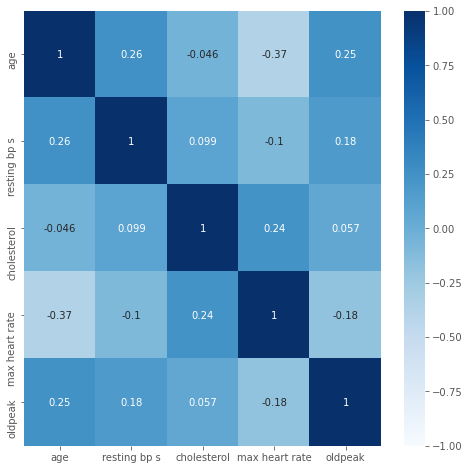

In [31]:
##GRáfico de correlaciones

plt.figure(figsize=(8,8))

sns.heatmap(data=datos[numericas].corr(),vmin=-1,vmax=1,annot=True,cmap="Blues");

### Conclusión análisi de correlaciones.

No existen variables fuertemente corelacionadas entre sí.

Vamos a analizar las variables comparadas con la target

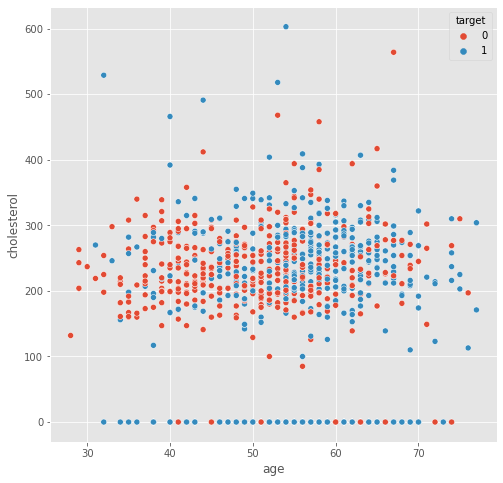

In [32]:
plt.figure(figsize=(8,8))

sns.scatterplot(x=datos["age"],y=datos["cholesterol"],hue=datos["target"]);

In [35]:
datos[datos["cholesterol"]==0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
294,65,1,4,115,0,0,0,93,1,0.0,2,1
295,32,1,1,95,0,1,0,127,0,0.7,1,1
296,61,1,4,105,0,1,0,110,1,1.5,1,1
297,50,1,4,145,0,1,0,139,1,0.7,2,1
298,57,1,4,110,0,1,1,131,1,1.4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
515,43,1,4,122,0,0,0,120,0,0.5,1,1
516,63,1,3,130,0,1,1,160,0,3.0,2,0
519,48,1,3,102,0,1,1,110,1,1.0,3,1
536,56,1,4,130,0,0,2,122,1,1.0,2,1


In [37]:
datos_sin_colesterol=datos[datos["cholesterol"]!=0]

In [38]:
datos_sin_colesterol

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


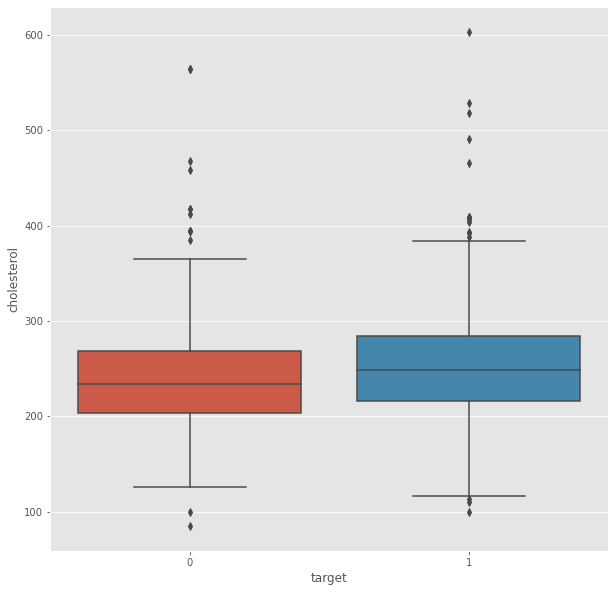

In [41]:
##Distribucion de las variables respecto a la variable objetivo

plt.figure(figsize=(10,10))

sns.boxplot(y=datos_sin_colesterol["cholesterol"],x=datos["target"]);

In [42]:
numericas

['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

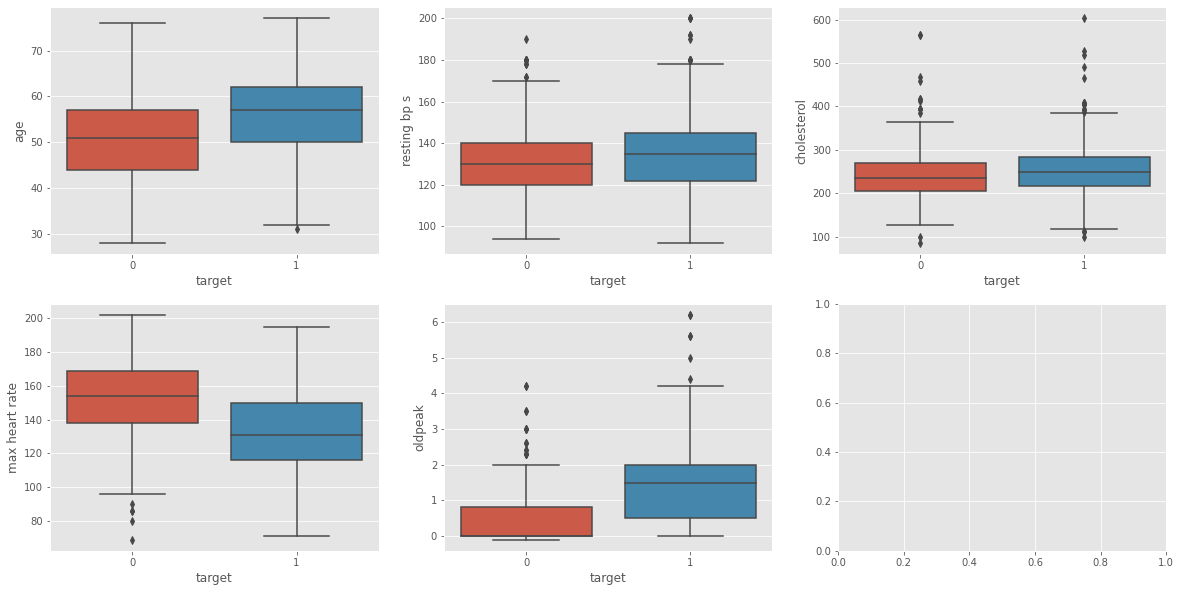

In [49]:
fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(20,10))
sns.boxplot(y=datos_sin_colesterol[numericas[0]],x=datos_sin_colesterol["target"],ax=axs[0][0])
sns.boxplot(y=datos_sin_colesterol[numericas[1]],x=datos_sin_colesterol["target"],ax=axs[0][1])
sns.boxplot(y=datos_sin_colesterol[numericas[2]],x=datos_sin_colesterol["target"],ax=axs[0][2])
sns.boxplot(y=datos_sin_colesterol[numericas[3]],x=datos_sin_colesterol["target"],ax=axs[1][0])
sns.boxplot(y=datos_sin_colesterol[numericas[4]],x=datos_sin_colesterol["target"],ax=axs[1][1]);



In [46]:
axs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CC0AA6188>,
      dtype=object)

### Análisis de variables categóricas

In [50]:
categoricas

['sex',
 'chest pain type',
 'fasting blood sugar',
 'resting ecg',
 'exercise angina',
 'ST slope']

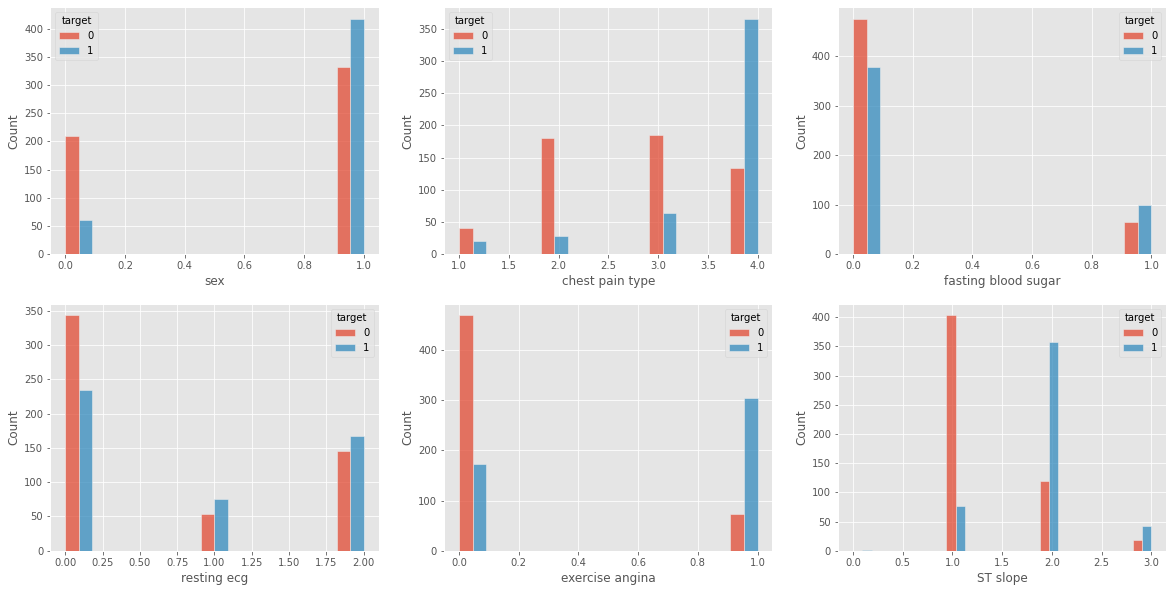

In [52]:
fis,axs=plt.subplots(nrows=2,ncols=3,figsize=(20,10))
sns.histplot(data=datos_sin_colesterol,x=categoricas[0],hue="target",multiple="dodge",ax=axs[0][0])
sns.histplot(data=datos_sin_colesterol,x=categoricas[1],hue="target",multiple="dodge",ax=axs[0][1])
sns.histplot(data=datos_sin_colesterol,x=categoricas[2],hue="target",multiple="dodge",ax=axs[0][2])
sns.histplot(data=datos_sin_colesterol,x=categoricas[3],hue="target",multiple="dodge",ax=axs[1][0])
sns.histplot(data=datos_sin_colesterol,x=categoricas[4],hue="target",multiple="dodge",ax=axs[1][1])
sns.histplot(data=datos_sin_colesterol,x=categoricas[5],hue="target",multiple="dodge",ax=axs[1][2]);


## Primer modelo: Árbol de decisión

Vamos a hacer un primer árbol solo con dos variables numéricas: oldpeak, max heat rate

Paso 1: Separamos el dataset en dos grupos: train para entrenar, test para validar. ¡¡¡SOBREAJUSTE!!!

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
train,test=train_test_split(datos_sin_colesterol,train_size=0.8,random_state=123)

In [58]:
X_train=train[numericas+categoricas]
X_test=test[numericas+categoricas]
y_train=train["target"]
y_test=test["target"]

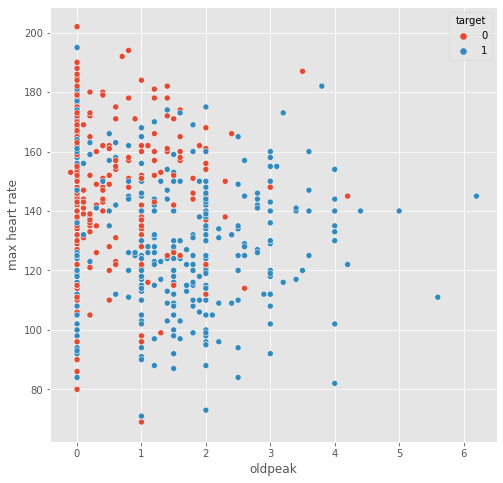

In [61]:
plt.figure(figsize=(8,8))

sns.scatterplot(x=datos_sin_colesterol["oldpeak"],y=datos_sin_colesterol["max heart rate"],hue=datos_sin_colesterol["target"]);

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
arbol_basico=DecisionTreeClassifier(max_depth=3,random_state=123)

In [92]:
arbol_basico.fit(X_train[["oldpeak","cholesterol"]],y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [93]:
from sklearn.tree import plot_tree

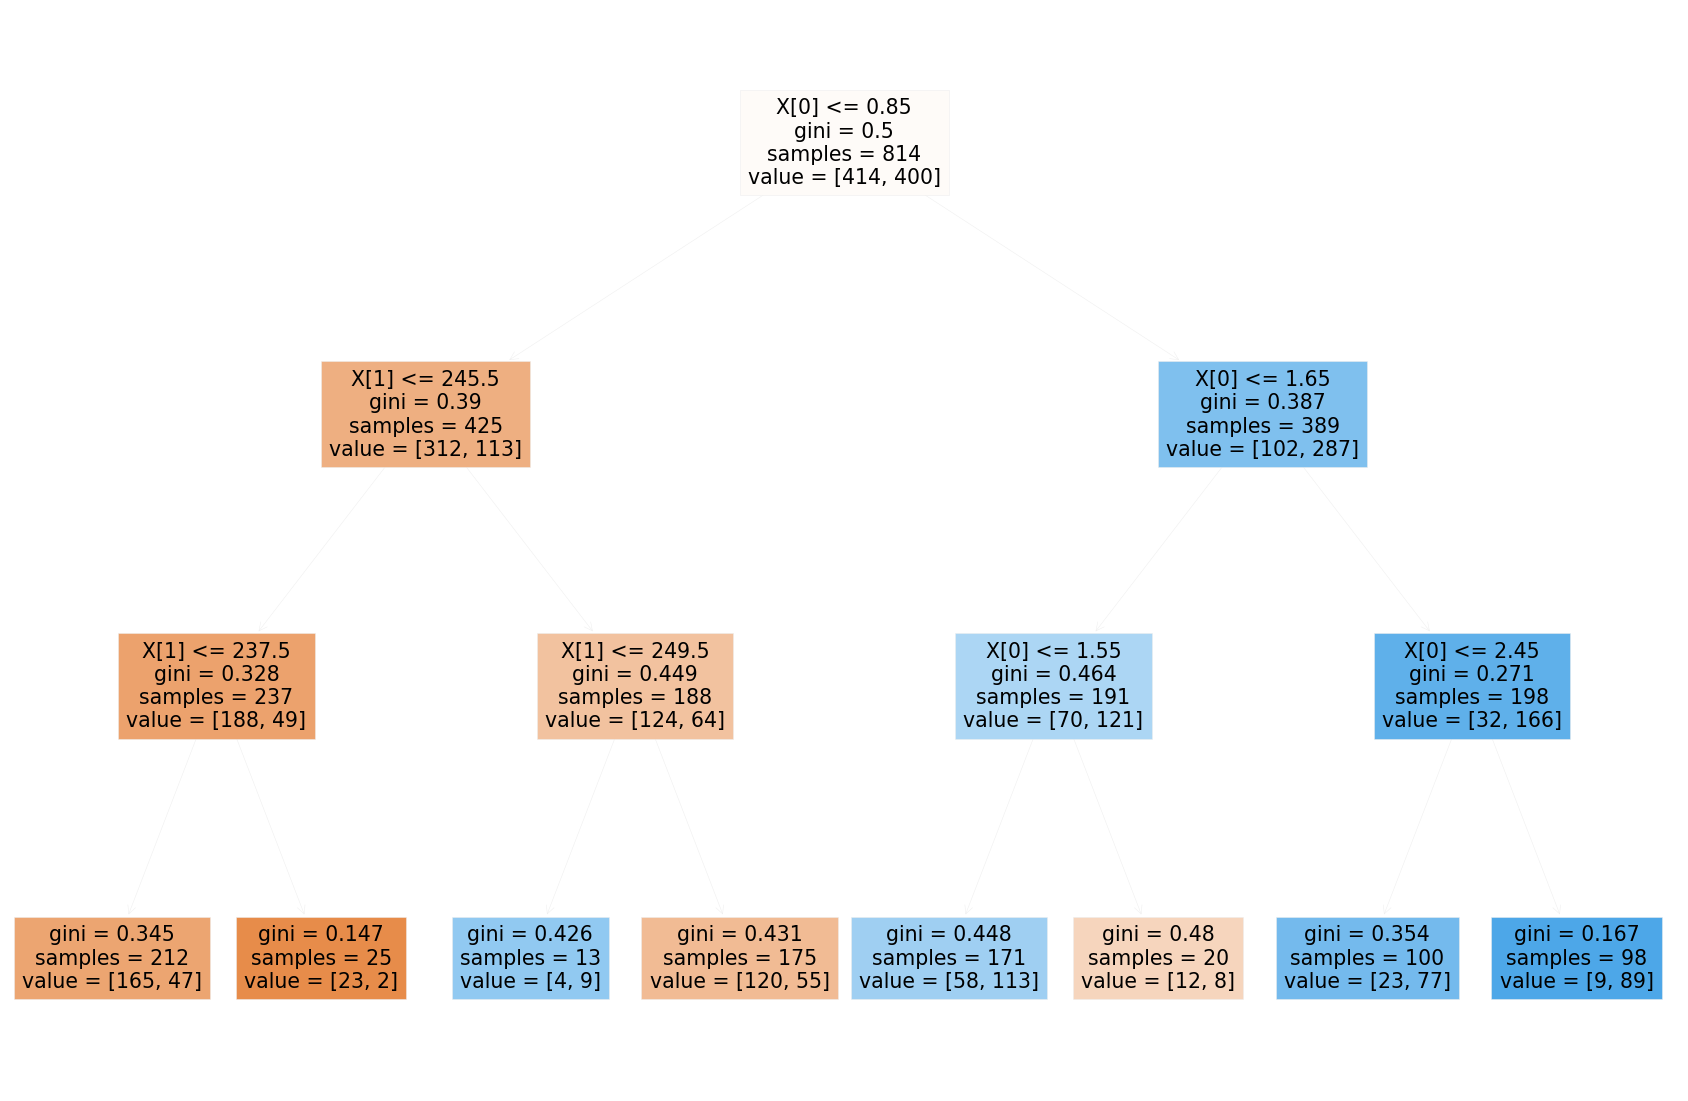

In [94]:
plt.figure(figsize=(30,20))
plot_tree(arbol_basico,filled=True)
plt.show()

In [95]:
arbol_basico.score(X_test[["oldpeak","cholesterol"]],y_test)

0.7450980392156863

In [96]:
arbol_basico.score(X_train[["oldpeak","cholesterol"]],y_train)

0.7469287469287469

In [97]:
arbol_basico.feature_importances_

array([0.92703145, 0.07296855])

### Modelo final: ÁRbol completo

In [130]:
arbol=DecisionTreeClassifier(max_depth=5,random_state=123)

In [131]:
arbol.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

In [132]:
arbol.feature_importances_

array([0.01429349, 0.07806892, 0.        , 0.03874876, 0.08037258,
       0.04961633, 0.14068743, 0.01286222, 0.        , 0.05342995,
       0.53192031])

In [133]:
X_train.columns

Index(['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak',
       'sex', 'chest pain type', 'fasting blood sugar', 'resting ecg',
       'exercise angina', 'ST slope'],
      dtype='object')

In [134]:
importancia=pd.DataFrame(arbol.feature_importances_).T
importancia.columns=X_train.columns
importancia

,age,resting bp s,cholesterol,max heart rate,oldpeak,sex,chest pain type,fasting blood sugar,resting ecg,exercise angina,ST slope
0,0.014293,0.078069,0.0,0.038749,0.080373,0.049616,0.140687,0.012862,0.0,0.05343,0.53192


In [135]:
arbol.score(X_test,y_test)

0.8480392156862745

In [136]:
arbol.score(X_train,y_train)

0.898034398034398

In [137]:
arbol.predict_proba(X_test)

array([[0.04878049, 0.95121951],
       [1.        , 0.        ],
       [0.88888889, 0.11111111],
       [0.04878049, 0.95121951],
       [0.43181818, 0.56818182],
       [0.43181818, 0.56818182],
       [0.95180723, 0.04819277],
       [0.18181818, 0.81818182],
       [0.43181818, 0.56818182],
       [0.2       , 0.8       ],
       [0.04878049, 0.95121951],
       [0.04878049, 0.95121951],
       [0.43181818, 0.56818182],
       [0.95180723, 0.04819277],
       [0.7027027 , 0.2972973 ],
       [0.95180723, 0.04819277],
       [0.04878049, 0.95121951],
       [0.10416667, 0.89583333],
       [0.43181818, 0.56818182],
       [0.95180723, 0.04819277],
       [0.95180723, 0.04819277],
       [0.95180723, 0.04819277],
       [0.        , 1.        ],
       [0.95180723, 0.04819277],
       [0.43181818, 0.56818182],
       [0.04878049, 0.95121951],
       [0.04878049, 0.95121951],
       [0.95180723, 0.04819277],
       [0.        , 1.        ],
       [0.10416667, 0.89583333],
       [0.